<a href="https://colab.research.google.com/github/rharkovsky/puc_mvp1/blob/main/MVP1_Harkovsky4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise Exploratória de Dados 

## ROBERTO HARKOVSKY

### Base Netflix Originals

## 1. Definição do Problema

O dataset usado neste projeto será o NetflixOriginals, proveniente originalmente do Kagle. Este dataset consiste em todos os filmes originais da Netflix lançados em 1º de junho de 2021. Além disso, também inclui todos os documentários e especiais da Netflix. Seu objetivo é apresentar as características do filme e sua classificação IMDB que mede a receptividade do público. O score do IMDB são obtidos através de votação dos membros da comunidade. Além disto a maioria dos filmes tem mais de 1.000 críticas. 

As possiveis variáveis preditoras nesta análise incluem Genre, Premiere, Runtime e linguagem. A variável alvo é o IMDB Score

Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores 


**Informações sobre os atributos originais:**

1.	Title - Título do filme
2.	Genre - Gênero do filme
3.	Premiere - Data de estreia do filme original
4.	Runtime - Tempo de execução do filme em minutos
5.	IMDB Score - Pontuações do IMDB (a partir de 01/06/21) que indicam a aceitação do público para o produto Original lançado
6.	Language - Linguagem na qual o filme foi produzido (a partir de 01/06/21)


## 2. Carga de dados
Nesta primeira etapa será feita a importação dos pacotes necessários a análise. Em seguida ocorre a carga do dataset


### Importando Biliotecas

In [ ]:
# imports
import warnings
warnings.filterwarnings("ignore")

# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Transformações Numéricas
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import StandardScaler # para padronização
## Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

### Funções utilizadas nesta análise exploratória dos dados
Trata-se de um conjunto de funções úteis para impressão de graficos e informações sobre os datasets utilizadados ao longo desta analise exporatória, que aparecem em diversas etapas da análise.

O objetivo é tornar o codigo mais limpo e de fácil de entendimento.

In [ ]:
# Função para impressão de 2 gráficos barplot
# parametros: 
# var1 - Atributo a ser comparado, 
# linhas - quantidade de linhas da tabela a apresentar
def imprime2graficos (var1, linhas, absoluto):

# Mostra top generos avaliados definido por parametro "linhas"
  plt.figure(figsize=(10,15))
  sns.set(style="darkgrid")

  avg_rating_df = ds.groupby([var1], as_index = False)['IMDB'].mean().sort_values('IMDB', ascending=False)
  top_titulos_df = ds.groupby([var1], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
  top_titulos_df = top_titulos_df[0:linhas]
  avg_rating_top_df = avg_rating_df[(avg_rating_df[var1].isin(top_titulos_df[var1]) == True)] # maiores IMDBs relativos top linhas
  #avg_rating_df = avg_rating_df[0:linhas] # maiores IMDBs absolutos

  fig, (ax1, ax2) = plt.subplots(2,1, layout='constrained')

# 1o gráfico
  ax1.set_title('Maiores Lançamentos de filmes por ' + var1 +' (top '+ str(linhas) +')', fontsize = 10)
  ax1.set_xlabel('Lançamentos', fontsize = 10)
  #ax1.set_ylabel('Quantidade de Titulos', fontsize=10)
  sns.barplot(x = 'Titulo', y = var1, data = top_titulos_df, ax = ax1)
  
# 2o gráfico
  ax2.set_title('Média de Avaliações dos Maiores Lançamentos por ' + var1 +' (top '+ str(linhas) +')', fontsize = 10)
  ax2.set_xlabel('IMDB', fontsize = 10)
  #ax2.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right", fontsize=6)
  sns.barplot(x = 'IMDB', y = var1, data = avg_rating_top_df, ax=ax2)

  plt.subplots_adjust(hspace=0.6);
  plt.yticks(size= 10)
  plt.xticks(size= 10)
  plt.show()

# Função para impressão de um gráfico barplot
# parametros: 
# var1 - Atributo a ser comparado, 
# linhas - quantidade de linhas da tabela a apresentar
def imprime1grafico (var1, linhas):
  avg_rating_df = ds.groupby([var1], as_index = False)['IMDB'].mean().sort_values('IMDB', ascending=False)
  top_titulos_df = ds.groupby([var1], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
  avg_rating_df = avg_rating_df[0:linhas] # maiores IMDBs absolutos

  fig, (ax1) = plt.subplots(1,1, figsize= (10,3), layout='constrained')

  ax1.set_title('Média de Avaliações por ' + var1 +' (top '+ str(linhas) +')', fontsize = 10)
  ax1.set_xlabel('Lançamentos', fontsize = 10)
  sns.barplot(x = 'IMDB', y = var1, data = avg_rating_df, ax=ax1)


# Função para impressão das tabelas que alimentas os graficos
# parametros: 
# atrib1 - Atributo a ser comparado, 
# linhas - quantidade de linhas da tabela a apresentar
def imprime2tabelas(atr1, linhas):
  avg_rating_df = ds.groupby([atr1], as_index = False)['IMDB'].mean().sort_values('IMDB', ascending=False)
  top_df = ds.groupby([atr1], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
  top_df = top_df[0:linhas]
  display(top_df)
  print(f'\n')
  avg_rating_df = avg_rating_df[(avg_rating_df[atr1].isin(top_df[atr1]) == True)]
  display(avg_rating_df)

# Função para impressão de 2 gráficos boxplot
# parametros: 
# var1,var2 - Atributos a serem impressos 
def imprime2graficosboxplot(var1, var2):

  def outliers(variavel):
 #calculado a faixa doa quatis a serem usados
    imdb_q1 = ds[variavel].quantile(0.25) #1o quartil 
    imdb_q3 = ds[variavel].quantile(0.75) #3o quartil
    imdb_iqr = imdb_q3-imdb_q1 # calculando 2o quartil
    imdb_up = imdb_q3 + 1.5 * imdb_iqr #limte superior do 4o quartil
    imdb_low = imdb_q1 - 1.5 * imdb_iqr #limite inferior do 1o quartil
  # descobrindo os outliers 
    outlier_imdb = ds[(ds[variavel] < imdb_low) | (ds[variavel] > imdb_up)]
    count_imdb = outlier_imdb.count()[variavel]
    
    print(f"Outliers de {variavel}: {count_imdb}")
    return(ds[variavel])

# Imprimindo gráficos
  plt.figure(figsize=(10,15))
  #sns.set(style="darkgrid")
  fig, (ax1, ax2) = plt.subplots(2,1, layout='constrained')

# 1o gráfico
  ax1.set_title('outliers de ' + var1 , fontsize = 10)
  #ax1.set_xlabel('Lançamentos', fontsize = 10)
  #ax1.set_ylabel('Quantidade de Titulos', fontsize=10)
  sns.boxplot(x = outliers(var1), ax=ax1)
  
# 2o gráfico
  ax2.set_title('outliers de ' + var2 , fontsize = 10)
  #ax2.set_xlabel('IMDB', fontsize = 10)
  sns.boxplot(x = outliers(var2), ax=ax2)
  
  plt.subplots_adjust(hspace=0.6);
  #plt.yticks(size= 10)
  #plt.xticks(size= 10)
  plt.show()

# Função para contagem de variaveis (atributos) por titulo
# parametros: 
# var - Atributos a serem contados 
def conta_var(var):
  general_df = ds.groupby([var], as_index = False)['Titulo'].count().sort_values('Titulo', ascending=False)
  num = general_df[var].count()
  print(f'Existem {num} diferentes {var}')
  return(general_df)

### *Preparando o Dataset*

In [ ]:
# conexão com GDrive
from google.colab import drive
drive.mount('/content/gdrive')

# url a importar
arquivo = "NetflixOriginals.csv"
url_dados = "/content/gdrive/MyDrive/datasets/" + arquivo


# carga do dataset através do csv
ds = pd.read_csv(url_dados, delimiter=',', encoding='ISO-8859-1')

# verifica o tipo
print(type(ds))

# exibe as 5 primeiras linhas
ds.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>


,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


Para uma melhor documentação decidi alterar os nomes das variaveis para Portugues

In [ ]:
# Aproveitando a alteração para traduzir as colunas 
ds.rename(columns= {'Title' : 'Titulo'}, inplace= True)
ds.rename(columns= {'Genre' : 'Genero'}, inplace= True)
ds.rename(columns= {'Runtime' : 'Duracao'}, inplace= True)
ds.rename(columns= {'Language' : 'Linguagem'}, inplace= True)
ds.rename(columns= {'IMDB Score' : 'IMDB'}, inplace= True)

# exibe as 5 primeiras linhas
ds.head()

,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


## 3. Análise Exploratória de Dados
Nesta etapa será realizada uma primeira análise das variaveis do dataset, onde serão determinadas as suas dimensões, tipos de variaveis (qualitativas e quantitativas), além de uma primeira avaliação estatísticas dos dados numéricos.

### 3.1. Estatísticas Descritivas
Verificando informações do dataset, como  dimensão, variaveis e estatísticas das variaveis numéricas.

In [ ]:
# Dimensões do dataset
print(f'*** Dimensões do dataset ***\n')
print(ds.shape)


*** Dimensões do dataset ***

(584, 6)


O dataset possui 6 colunas com 584 linhas

In [ ]:
# exibe as 10 primeiras e 10 últimas linhas para ter uma amostra inicial sobre dados missing
display(ds.head(10))
display(ds.tail(10))

,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem
574,Seaspiracy,Documentary,"March 24, 2021",89,8.2,English
575,The Three Deaths of Marisela Escobedo,Documentary,"October 14, 2020",109,8.2,Spanish
576,Cuba and the Cameraman,Documentary,"November 24, 2017",114,8.3,English
577,Dancing with the Birds,Documentary,"October 23, 2019",51,8.3,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,"May 20, 2020",85,8.4,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese
583,David Attenborough: A Life on Our Planet,Documentary,"October 4, 2020",83,9.0,English


Aparentemente sem missings

In [ ]:
# Mostra as informações sobre as variáveis do dataset
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Titulo     584 non-null    object 
 1   Genero     584 non-null    object 
 2   Premiere   584 non-null    object 
 3   Duracao    584 non-null    int64  
 4   IMDB       584 non-null    float64
 5   Linguagem  584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB
None


In [ ]:
# exibindo um sumário estatístico
display(ds.describe())

,Duracao,IMDB
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000



---


**Resumo da análise estatística**

*   Temos um dataset com 6 colunas com 584 linhas
*   No dataset temos um total de 6 variaveis, onde 4 são do tipo object (Titulo, Genero, Premiere, Linguagem) e 2 numéricas: 1 do tipo int (Duracao) e 1 do tipo float(IMDB). 
*   A pontuação média do IMDB é de 6,3, com valores mínimo de 2,5 e máximo de 9,0
*   O tempo de duração médio de um filme é 94 minutos, com valor mínimo de 4 minutos e máximo de 209 minutos.
*   Algumas  variaveis tipo object serão categorizadas mais a frente para possibilitar uma avaliação de correlação delas com  o IMDB

---



### 3.2. Visualizações Unimodais

Para avaliar avaliar a distribuição de frequências das variáveis e Duração e IMDB irei criar um histograma eum grafico de densidade para cada um destes atributos numéricos do dataset.

Utilizarei ainda o gráfico de boxplot para verificar a existencia de outliers

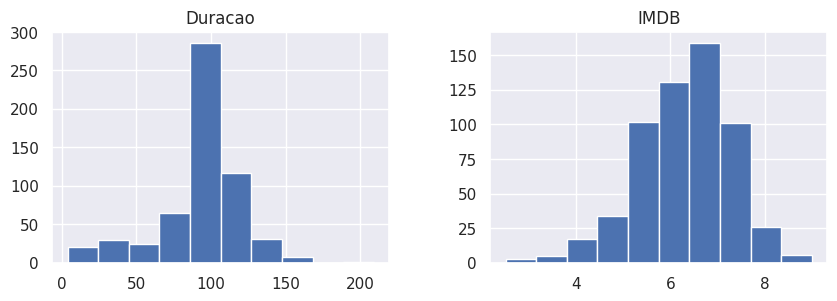

In [ ]:
# Histograma
ds.hist(figsize = (10,3))
plt.show()

O gráfico mostra que as variáveis IMDB e Duracao apresentam um comportamento aproximado de uma curva normal.

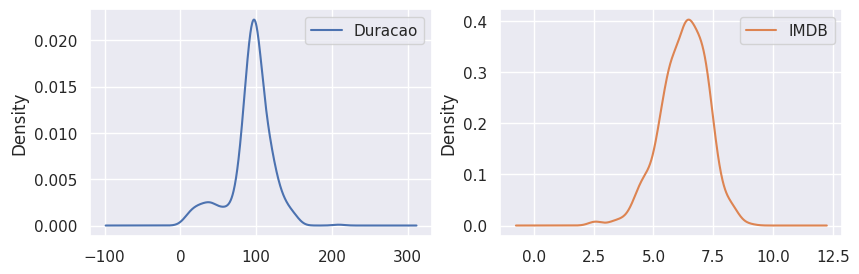

In [ ]:
# Density Plot
ds.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Existe moda única para ambas variáveis, sem skew

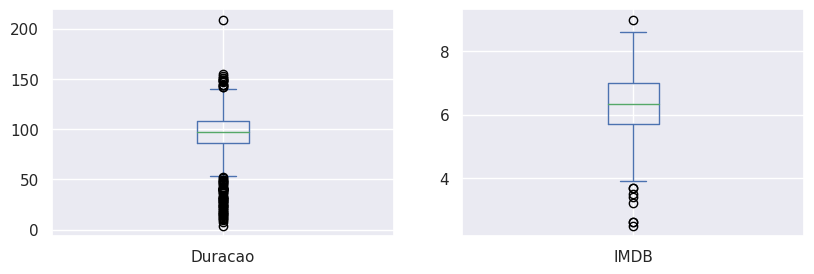

In [ ]:
# Boxplot
ds.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Outliers presentes em ambas variáveis

---


**Percepções da análise estatística Visual:**


*   Os graficos de histograma e densidade mostram as variáveis IMDB e Duracao apresentando um comportamento aproximado de uma curva normal. 
*   O gráfico boxplot mostra a existencia de outliers em ambas variáveis.
*   O gráfico de densidade mostra ainda apenas uma moda para cada variável e, também não apresentam *skew*, o que sugere que o valor da mediana é próximo a média, apesar dos outliers presentes.
*   A média do tempo de duração está na ordem dos 90 minutos (93,6) e o desvio-padrão em quase 30 minutos (27,8).






---

**Determinando os Outliers**

Outliers de IMDB: 9
Outliers de Duracao: 75


<Figure size 1000x1500 with 0 Axes>

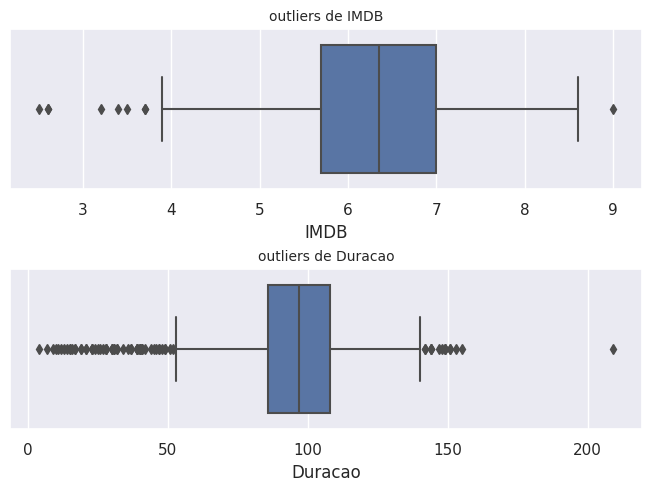

In [ ]:
imprime2graficosboxplot('IMDB', 'Duracao')



---
Existem outliers em ambas as variaveis:

IMDB - 9 
  
Duração - 75



---



### 3.3. Visualizações Multimodais
Nesta etapa objetivo é de buscar uma correlação entre as variáveis numéricas preditoras com a variável alvo IMDB. 

inicialmente, como temos apenas 2 variaveis numéricas, IMDB e Duracao, faremos a analise nelas. 

Será avaliado a existencia de uma possivel correlação, e também se existe algum relacionamento entre estas variáveis.

Medindo a correlação e avaliando a dispersão entre as variaveis

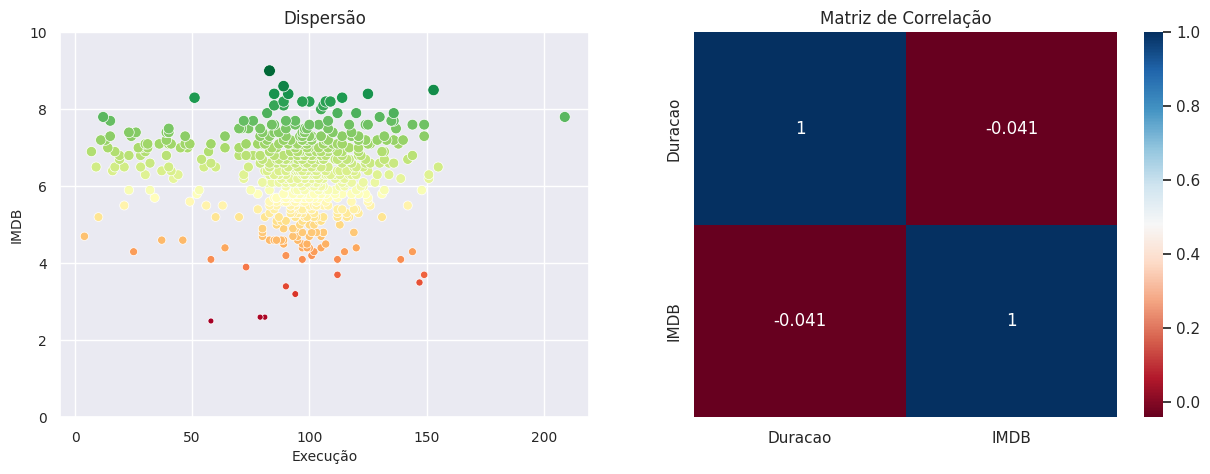

In [ ]:
plt.figure(figsize= (15, 5))

#grafico de dispersão entre as variaveis IMDB  e Duração
plt.subplot(1, 2, 1)

ax = sns.scatterplot(data= ds, 
                x= 'Duracao', 
                y= 'IMDB', 
                hue= 'IMDB', 
                size= 'IMDB',
                palette= 'RdYlGn',
                legend= False)

ax.set_ylim((0, 10))
plt.title('Dispersão', size= 12)
plt.xlabel('Execução', size= 10)
plt.ylabel('IMDB', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)

# Matriz de Correlação entre as variaveis IMDB Score e Runtime
plt.subplot(1, 2, 2)

plt.title('Matriz de Correlação', size= 12)
sns.heatmap(ds.corr(), annot=True, cmap='RdBu');

#sns.histplot(ds['Runtime'])
#plt.title('Runtime Distribuition', size= 20)
#plt.xlabel('Runtime', size= 17)
#plt.yticks(size= 15)
#plt.xticks(size= 15)

plt.show()


---


**Percepção da análise Multimodal de correlação e dispersão**

*  Não há correlação aparente entre o tempo de exibição (Duracao) e a avaliação obtida (IMDB)
*  avaliando o relacionamento, aparentemente as maiores notas IMDB se situam em volta da média de duração (90 minutos) com até um desvio padrão de distancia (30 minutos)
*   Um outro achado é que aparentemente os filmes com menor tempo de duração, abaixo de 1 desvio padrão (cerca de menos de 60 minutos) tem  avaliações mais alta em comparação a média.







---





---

**Análise de correlação das demais variáveis preditoras não numéricas com variavel alvo IMDB**

Para completar a análise de correlação, existem ainda 2 perguntas a serem respondidas:
1. Existe uma correlação entre a linguagem utilizada no filme e a nota obtida?
2. Existe uma correlação entre a gênero do filme e a nota obtida?

Para respondê-las, será necessário uma transformação categórica nas variaveis preditoras Linguagem e Gênero

Iniciando a transformação das variaveis do tipo objeto (não numéricas) em valores numericos para análise de correlação

In [ ]:
# categorizando os dados não numericos
x = ds.values[:,1:6]
#y = ds.values[:, 4]

# ordinal encoding para os atributos x
encoded_X = OrdinalEncoder().fit_transform(x)

# exibindo amostra dos dados transformados
print("Atributos transformados:")
print(encoded_X[:5, :]) # 5 primeiras linhas, todas as colunas
ds.columns[1:6]

Atributos transformados:
[[ 45.  58.  42.   0.   6.]
 [106.  47.  56.   1.  29.]
 [ 93.  85.  54.   1.  20.]
 [ 63. 138.  69.   2.   2.]
 [ 73. 342.  65.   3.  18.]]


Index(['Genero', 'Premiere', 'Duracao', 'IMDB', 'Linguagem'], dtype='object')

In [ ]:
# convertendo Array em dataset para uso dos gráficos
dsCategorizado = pd.DataFrame(encoded_X, columns=ds.columns[1:6])
# apagando a coluna "Premiere"
dsCategorizado=dsCategorizado.drop(columns=['Premiere'])

dsCategorizado.head(10) # Apresenta 10 primeiras linhas

,Genero,Duracao,IMDB,Linguagem
0,45.0,42.0,0.0,6.0
1,106.0,56.0,1.0,29.0
2,93.0,54.0,1.0,20.0
3,63.0,69.0,2.0,2.0
4,73.0,65.0,3.0,18.0
5,0.0,117.0,4.0,18.0
6,32.0,87.0,5.0,37.0
7,56.0,119.0,5.0,2.0
8,72.0,49.0,6.0,2.0
9,32.0,113.0,7.0,18.0


In [ ]:
# Checando se a categorização foi bem sucedida, comparando valores das 10 primieras linhas
ds.head(10)

,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


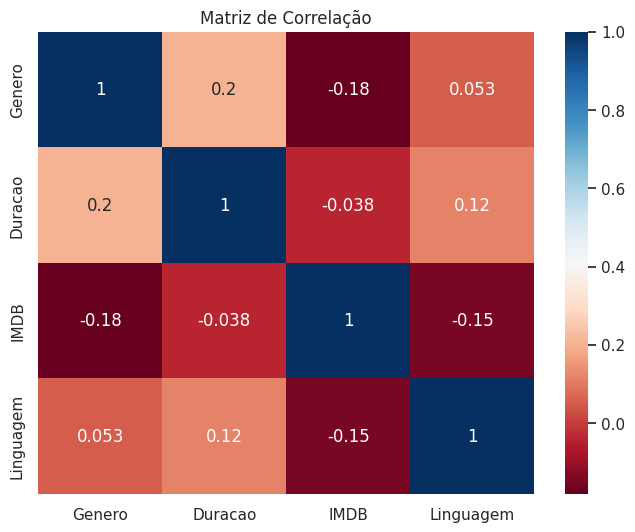

In [ ]:
# Gerando a Matriz de Correlação
plt.figure(figsize= (8, 6))
plt.title('Matriz de Correlação', size= 12)
sns.heatmap(dsCategorizado.corr(), annot=True, cmap='RdBu');


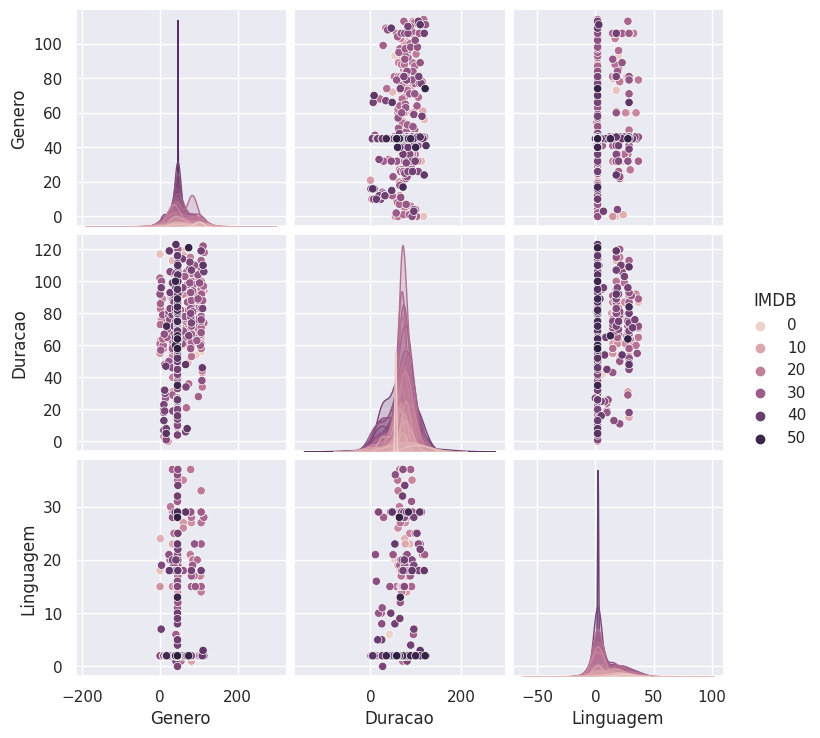

In [ ]:
# Apresentando gráficos de dispersão e densidade destas variaveis categorizadas 
sns.pairplot(dsCategorizado, hue = "IMDB", height = 2.5);


---

**Resultado da Análise de correlação das variáveis preditoras Linguagem e Gênero com variavel alvo IMDB**

1. Existe uma correlação entre a linguagem utilizada no filme e a nota obtida?

  Não há correlação aparente e nenhum relcionamento pode ser observado
2. Existe uma correlação entre a gênero do filme e a nota obtida?

  Não há correlação aparente e nenhum relcionamento pode ser observado




---
**Demais Visualizações**


Continuando a análise exploratória, a ideia a seguir é analisar o comportamento das possiveis variaveis preditoras Premiere, Linguagem e Genero com relação a variável alvo IMDB.

Primeiramente, para uma melhor análise do possivel efeito da variavel object Premiere na avaliação (IMDB) é interessante desmembrá-la  em novas variáveis numéricas: Ano, mes e dia da semana.

In [ ]:
# Desmembrando Premiere em Ano, mes e dia da semana
ds['Data'] = pd.to_datetime(ds.Premiere)
ds['DiaSemana'] = ds['Data'].dt.day_of_week 
ds['Mes'] = ds['Data'].dt.month
ds['Ano'] = ds['Data'].dt.year 

# Conferindo a tabela - Mostrando 5 linhas com novas variáveis
ds.head()

,Titulo,Genero,Premiere,Duracao,IMDB,Linguagem,Data,DiaSemana,Mes,Ano
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,0,8,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,4,8,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,3,12,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,4,1,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,4,10,2020


In [ ]:
# Mostrando as novas informações sobre as variáveis do dataset
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Titulo     584 non-null    object        
 1   Genero     584 non-null    object        
 2   Premiere   584 non-null    object        
 3   Duracao    584 non-null    int64         
 4   IMDB       584 non-null    float64       
 5   Linguagem  584 non-null    object        
 6   Data       584 non-null    datetime64[ns]
 7   DiaSemana  584 non-null    int64         
 8   Mes        584 non-null    int64         
 9   Ano        584 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 45.8+ KB
None


**i. Relação entre a Data do lançamento (Premiere) e a avaliação (IMDB) obtida.**

Nesta próxima etapa da análise, será avaliada a relação entre a data de lancamento e a sua avaliação obtida. Para isto as questões a responder aqui serão:

1. Em que ano houve um maior lançamentos de filmes originais?

2. Em qual mes houve maior número de lançamentos de filmes originais?

3. Qual dia de semana há uma preferencia por lançamentos?

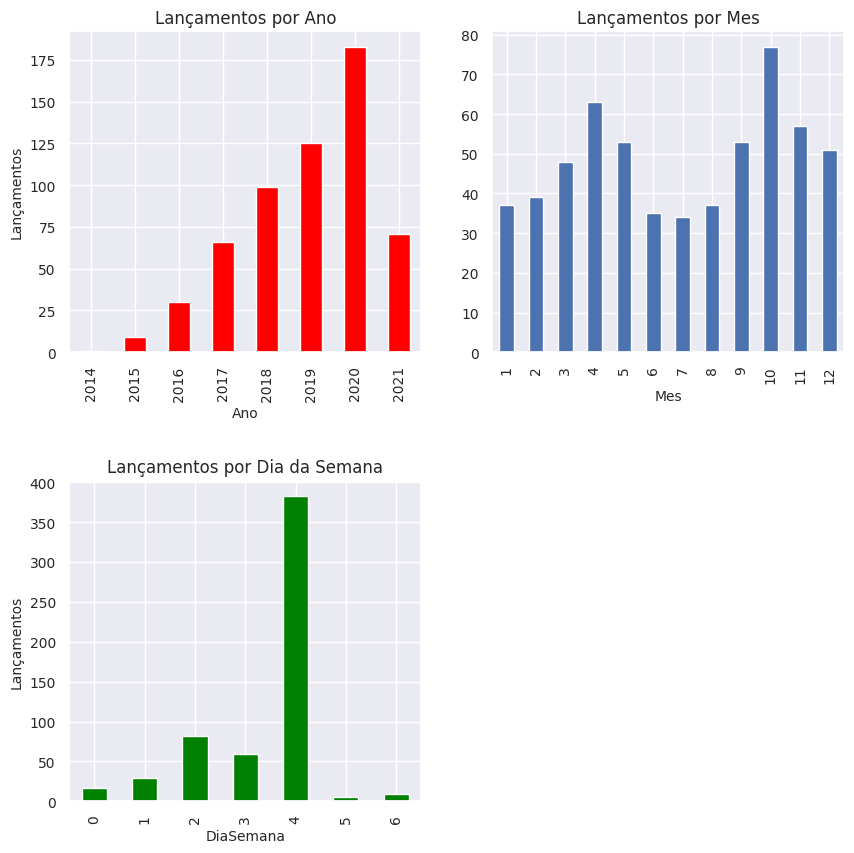

In [ ]:
# preparando os gráficos
plt.figure(figsize= (10, 10))

# gráfico de quantidade por ano
plt.subplot(2, 2, 1)
plt.title('Lançamentos por Ano', size= 12)
plt.ylabel('Lançamentos', size= 10)
plt.xlabel('ano', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
ds.groupby("Ano")["Titulo"].count().plot(kind = "bar", color='red')

# gráfico de quantidade por mes
plt.subplot(2, 2, 2)
plt.title('Lançamentos por Mes', size= 12)
#plt.ylabel('Lançamentos', size= 10)
plt.xlabel('mes', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
ds.groupby("Mes")["Titulo"].count().plot(kind = "bar")

# gráfico de quantidade por dia de semana
plt.subplot(2, 2, 3)
plt.title('Lançamentos por Dia da Semana', size= 12)
plt.ylabel('Lançamentos', size= 10)
plt.xlabel('Dia da Semana', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
#label_diasem = ['domingo','2af','3af','4af','5af','6af','sábado']
ds.groupby("DiaSemana")["Titulo"].count().plot(kind = "bar", color='green')

# apresntando os gráficos
plt.subplots_adjust(hspace=0.4);
plt.show()



---

**Respostas as perguntas:**
1. Em que ano houve um maior lançamentos de filmes originais?

  R: O ano com maior número de lançamentos no periodo avaliado foi 2020 no periodo estudado 

2. Em qual mes do ano ocorre um maior número de lançamentos de filmes originais?

  R: Existe uma tendencia de lançamentos nos meses de abril e outubro no periodo estudado 

3. Qual dia de semana há uma preferencia por lançamentos?

  R: Existe uma tendencia de lançamentos na 4a feira no periodo estudado 

**Outras Conclusões e Percepções**

* Observa-se uma tendência quase linear de aumento de lançamentos de originais, que foi quebrada em 2021, provavelmente devido a pandemia, que ocasionou atrasos e adiamentos de novas produções




---



**ii. Análise da variável "Genero"**

Nesta próxima etapa da análise, será avaliada a influência do "Genero" na quantidade de lançamentos realizados e na avaliação obtida. Para isto as questões a responder aqui serão:

1. Quantos e quais os principais generos?
2. Quais gêneros de filmes foram os mais lançados?
3. Quais gêneros de filmes tem melhor avaliação dentre os mais lançados?
4. Quais gêneros de filmes tem melhor avaliação?

In [ ]:
generos_df = conta_var('Genero')

Existem 115 diferentes Genero


<Figure size 5000x1500 with 0 Axes>

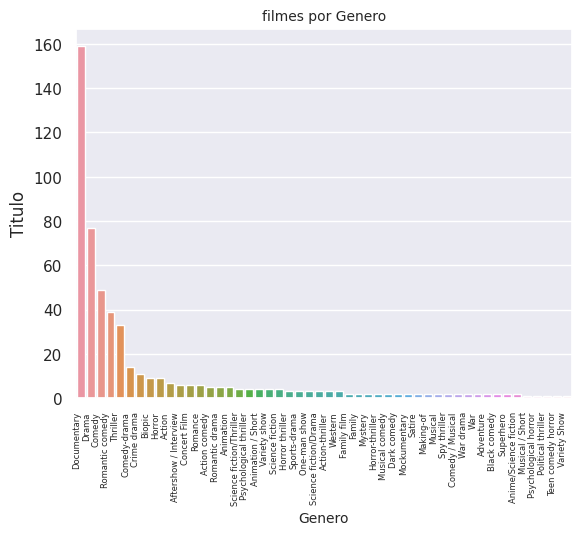

In [ ]:
# visão geral dos generos
# pegando 50 maiores para tornar o rafico legivel
generos_df=generos_df[0:50]

plt.figure(figsize=(50,15))
fig, ax = plt.subplots(1,1)

ax.set_title('filmes por Genero', fontsize = 10)
ax.set_xlabel('Lançamentos', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=6)

sns.barplot(y = 'Titulo', x = 'Genero', data = generos_df, ax = ax)

fig.show()

<Figure size 1000x1500 with 0 Axes>

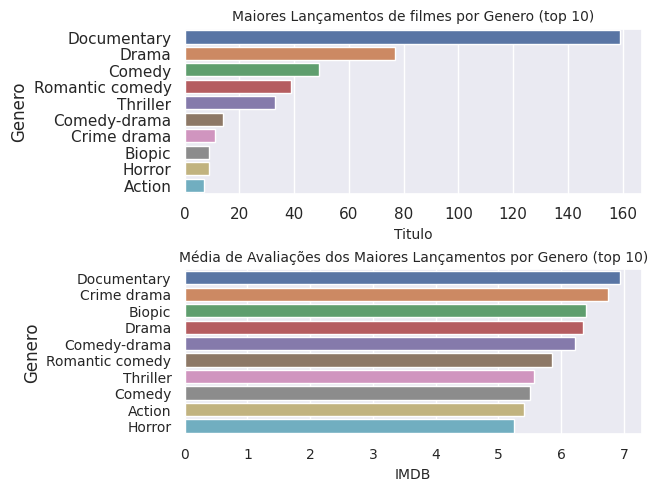

In [ ]:
# vamos trabalhar com os top 10
# analisa Genero x IMDB top 10
imprime2graficos('Genero',10, True)

In [ ]:
imprime2tabelas('Genero',10)

,Genero,Titulo
45,Documentary,159
46,Drama,77
32,Comedy,49
81,Romantic comedy,39
106,Thriller,33
36,Comedy-drama,14
41,Crime drama,11
26,Biopic,9
60,Horror,9
0,Action,7


,Genero,IMDB
45,Documentary,6.936478
41,Crime drama,6.745455
26,Biopic,6.400000
46,Drama,6.342857
36,Comedy-drama,6.214286
81,Romantic comedy,5.848718
106,Thriller,5.563636
32,Comedy,5.506122
0,Action,5.414286
60,Horror,5.255556


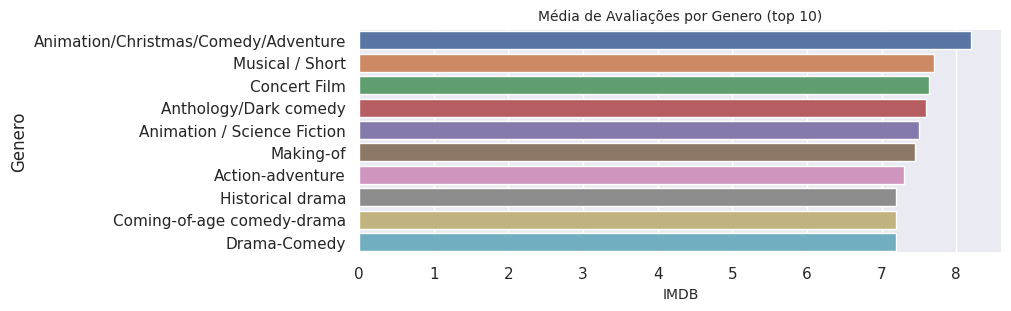

In [ ]:
imprime1grafico('Genero', 10)



---


**Resposta as Questões envolvendo "Genero":**

1. Quantos generos existem?

  Existem 115 generos 

2. Quais gêneros de filmes foram os mais lançados?

  Os 10 maiores generos em filmes observados são documentary, drama, Romantic comedy, Thriller, Comedy-Drama, Crime-Drama, Biopic, Horror e Action

3. Quais gêneros de filmes tem melhor avaliação dentre os mais lançados?

  As melhores avaliações entre os 10 mais lançados são Documentary, Crime drama, Biopic, Drama, Comedy-drama, Romantic comedy, Thriller, Comedy, Action e Horror

4. Quais gêneros de filmes tem melhor avaliação?

  Vide grafico

**Percepções**

Nenhuma dos gêneros mais bem avaliados aparece na lista dos 10 maiores generos usados em lançamentos.

As notas das top 10 generos mais bem avaliados são superiores as avaliações dos 10 maiores generos usados em lançamentos.

---



**iii. Análise da variável "Linguagem"**

Nesta próxima etapa da análise, será avaliada a influência da "linguagem" dos filmes na quantidade de lançamentos realizados e na avaliação obtida. Para isto as questões a responder aqui serão:

1. Quais linguagens mais lançadas?
2. Quais linguagens tem melhor avaliação dentre os maiores lançamentos?
3. Quais linguagens tem melhor avaliação?

In [ ]:
linguagem_df = conta_var('Linguagem')

Existem 38 diferentes Linguagem


<Figure size 5000x1500 with 0 Axes>

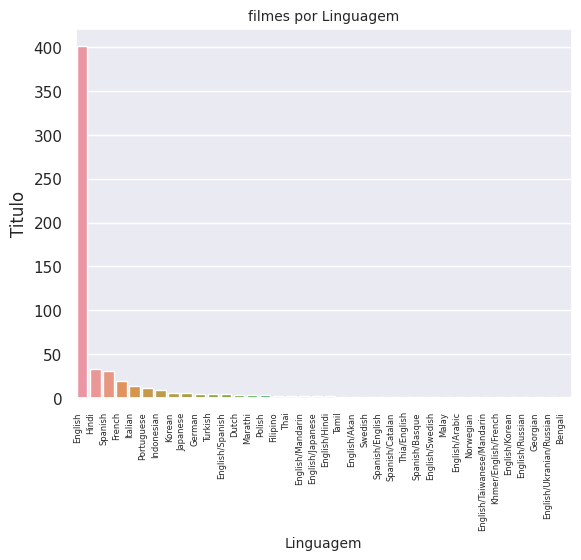

In [ ]:
# visão geral dos generos
# pegando as 50 maiores para tornar o grafico legível
linguagem_df = linguagem_df[0:50]

plt.figure(figsize=(50,15))
fig, ax = plt.subplots(1,1)

ax.set_title('filmes por Linguagem', fontsize = 10)
ax.set_xlabel('Lançamentos', fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right", fontsize=6)

sns.barplot(y = 'Titulo', x = 'Linguagem', data = linguagem_df, ax = ax)

fig.show()

<Figure size 1000x1500 with 0 Axes>

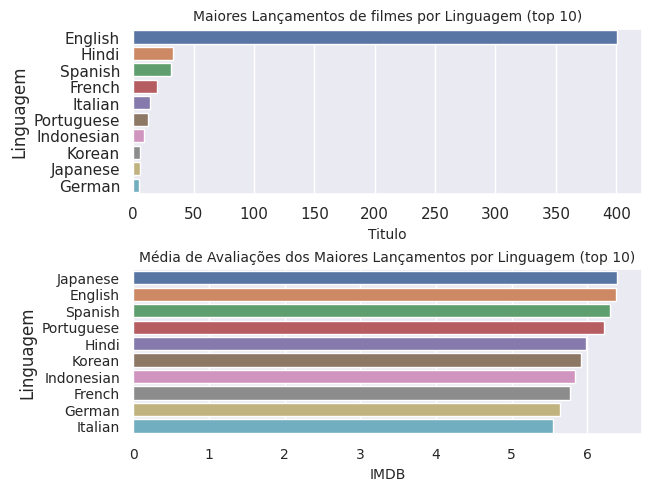

In [ ]:
# vamos trabalhar com os top 10
# analisa Linguagem  x IMDB
imprime2graficos('Linguagem', 10, True)

In [ ]:
imprime2tabelas('Linguagem',10)

,Linguagem,Titulo
2,English,401
18,Hindi,33
29,Spanish,31
15,French,20
20,Italian,14
28,Portuguese,12
19,Indonesian,9
23,Korean,6
21,Japanese,6
17,German,5


,Linguagem,IMDB
21,Japanese,6.400000
2,English,6.380050
29,Spanish,6.303226
28,Portuguese,6.216667
18,Hindi,5.981818
23,Korean,5.916667
19,Indonesian,5.844444
15,French,5.770000
17,German,5.640000
20,Italian,5.542857


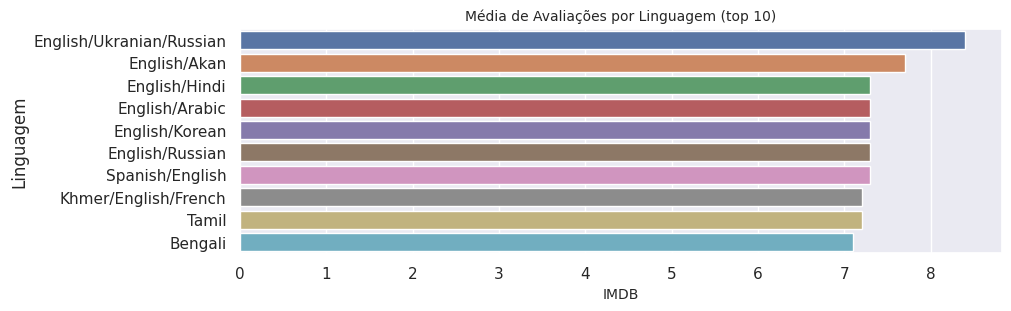

In [ ]:
imprime1grafico('Linguagem', 10)



---
**Resposta as Questões envolvendo "Linguagem":**

1. Quais linguagens mais lançadas?

  As linguagens mais usadas em filmes são (em ordem decrescente de quantidade de filmes): English, Hindi, Spanish, French, Italian, Portuguese, Indonesian, Korean, Japanese e German.

2. Quais linguagens tem melhor avaliação dentre os maiores lançamentos?

  Já dentre estas linguagens (mais usadas em filmes), a ordem decrescente das medias das avaliações é: Japanese, English, Spanish, Portuguese, Hindi, Korean, Indonesian, French, German e Italian.

3. Quais linguagens tem melhor avaliação?

  Vide gráfico

**Percepções**

A linguagem English aparece como uma das linguagens disponiveis nas 8 melhores avaliadas.

Nenhuma das linguagens mais bem avaliadas aparece na list das 10 maiores linguagens usadas em lançamentos.

As notas das top 10 Linguagens mais bem avaliados são superiores as avaliações das 10 maiores linguagens usadas em lançamentos.


---



## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook.

### 4.1. Tratamento de Missings e Limpeza

Avaliando a ocorrencia de nulls e/ou linhas duplicadas, verificando agora a quantidade de linhas preenchidas por coluna, número de valores nulls e ocorrencia de duplicidad

In [ ]:
# Checando número de valores nulls nas colunas
print(f'\n*** Valores Nulos ***')
print(ds.isnull().sum())
print(f'\n*** Linhas duplicadas ***')
print(ds.duplicated().sum())


*** Valores Nulos ***
Titulo       0
Genero       0
Premiere     0
Duracao      0
IMDB         0
Linguagem    0
Data         0
DiaSemana    0
Mes          0
Ano          0
dtype: int64

*** Linhas duplicadas ***
0


In [ ]:
# exibindo um sumário estatístico
display(ds.describe())

,Duracao,IMDB,DiaSemana,Mes,Ano
count,584.000000,584.000000,584.000000,584.000000,584.000000
mean,93.577055,6.271747,3.392123,6.859589,2018.936644
std,27.761683,0.979256,1.130585,3.466697,1.473992
min,4.000000,2.500000,0.000000,1.000000,2014.000000
25%,86.000000,5.700000,3.000000,4.000000,2018.000000
50%,97.000000,6.350000,4.000000,7.000000,2019.000000
75%,108.000000,7.000000,4.000000,10.000000,2020.000000
max,209.000000,9.000000,6.000000,12.000000,2021.000000


Aparentemente sem valores nulos e os valores 0 que aparecem na variável DiaSemana são válidos e significam "Domingo". Isto garante também que os valores da variavel objeto Premiere são válidos, pois nao aconteceu nenhum erro na conversão para Ano, Mes e diaSemana.

Para uma certificação de que realmente não há missing faremos uma visão gráfica.

<Axes: >

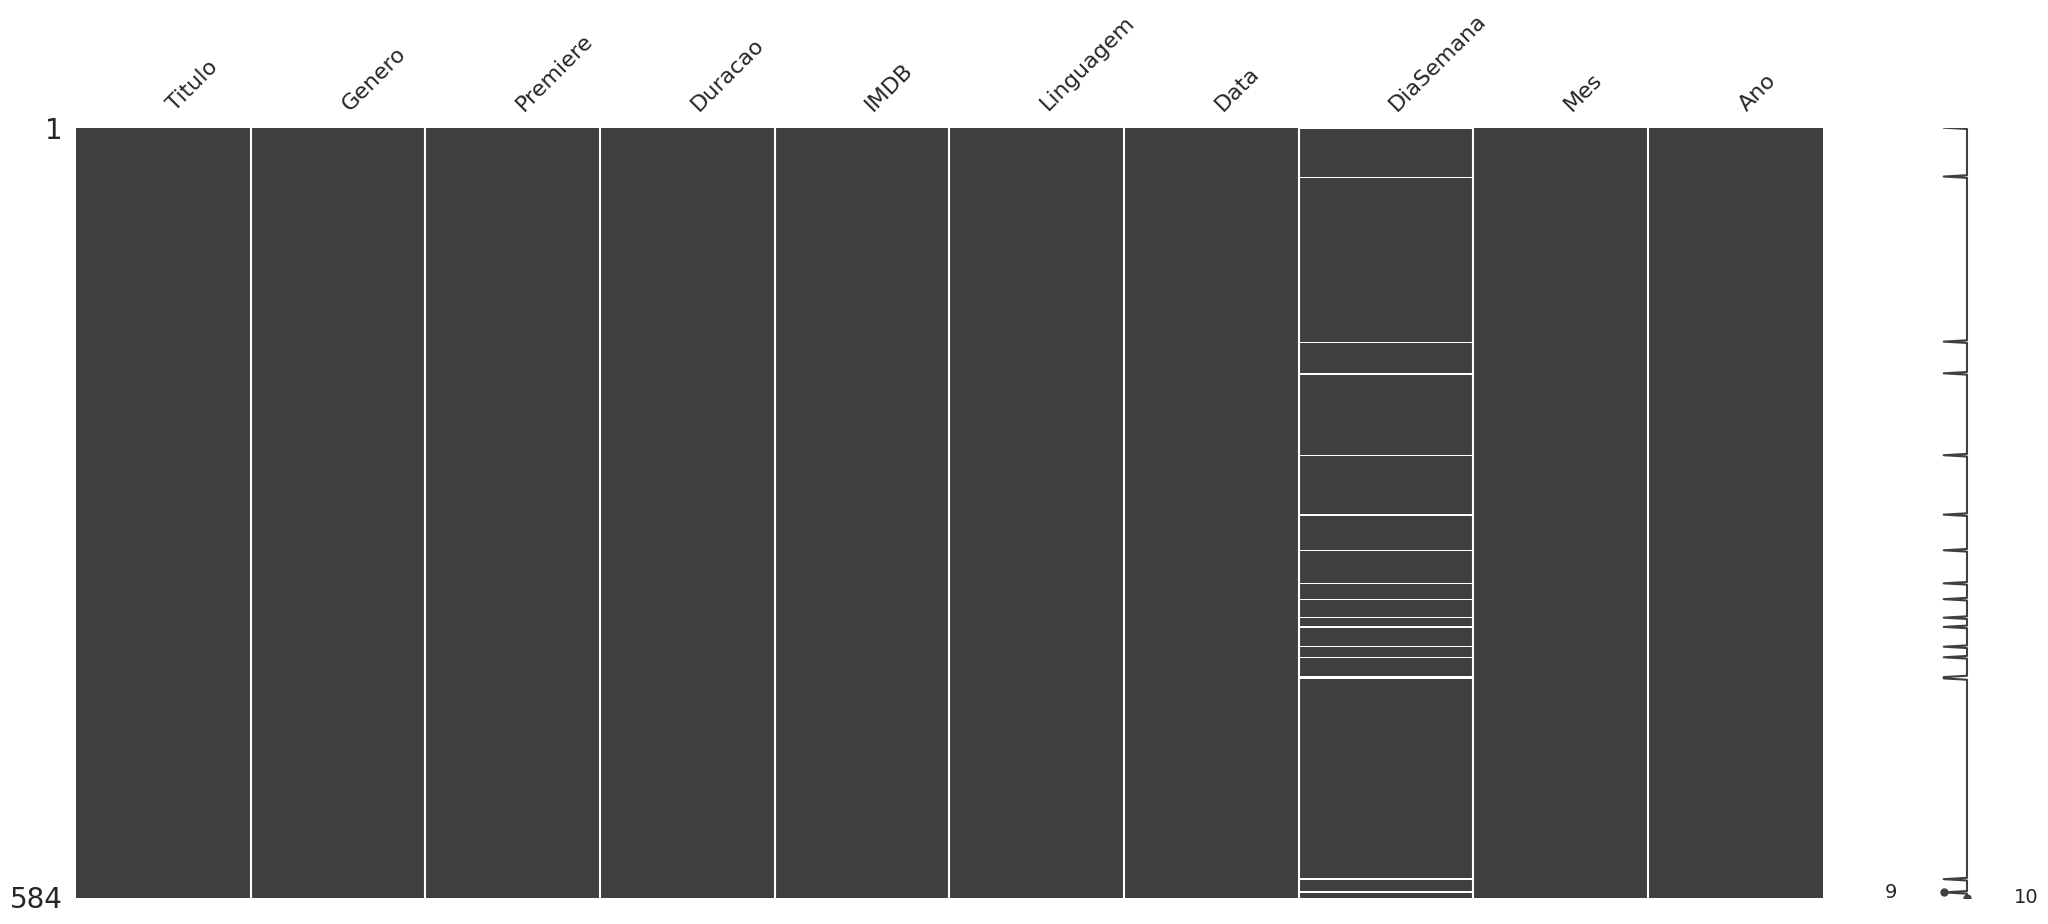

In [ ]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(ds.columns)

# o novo dataset irá conter todas as colunas do dataset original
dsNoMiss = ds[col[:]]

# substituindo os zeros por NaN - sem neessidade desta etapa
dsNoMiss.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dsNoMiss)

In [ ]:
# verificando novamente nulls no dataset
dsNoMiss.isnull().sum()

Titulo        0
Genero        0
Premiere      0
Duracao       0
IMDB          0
Linguagem     0
Data          0
DiaSemana    17
Mes           0
Ano           0
dtype: int64

Como esperado, a análise mostra apenas o falso Missing, uma vez que o valor 0 na variavel DiaSemana é válido e significa "Domingo".

Desprezando as colunas derivadas de Premiere e reavaliando

---



<Axes: >

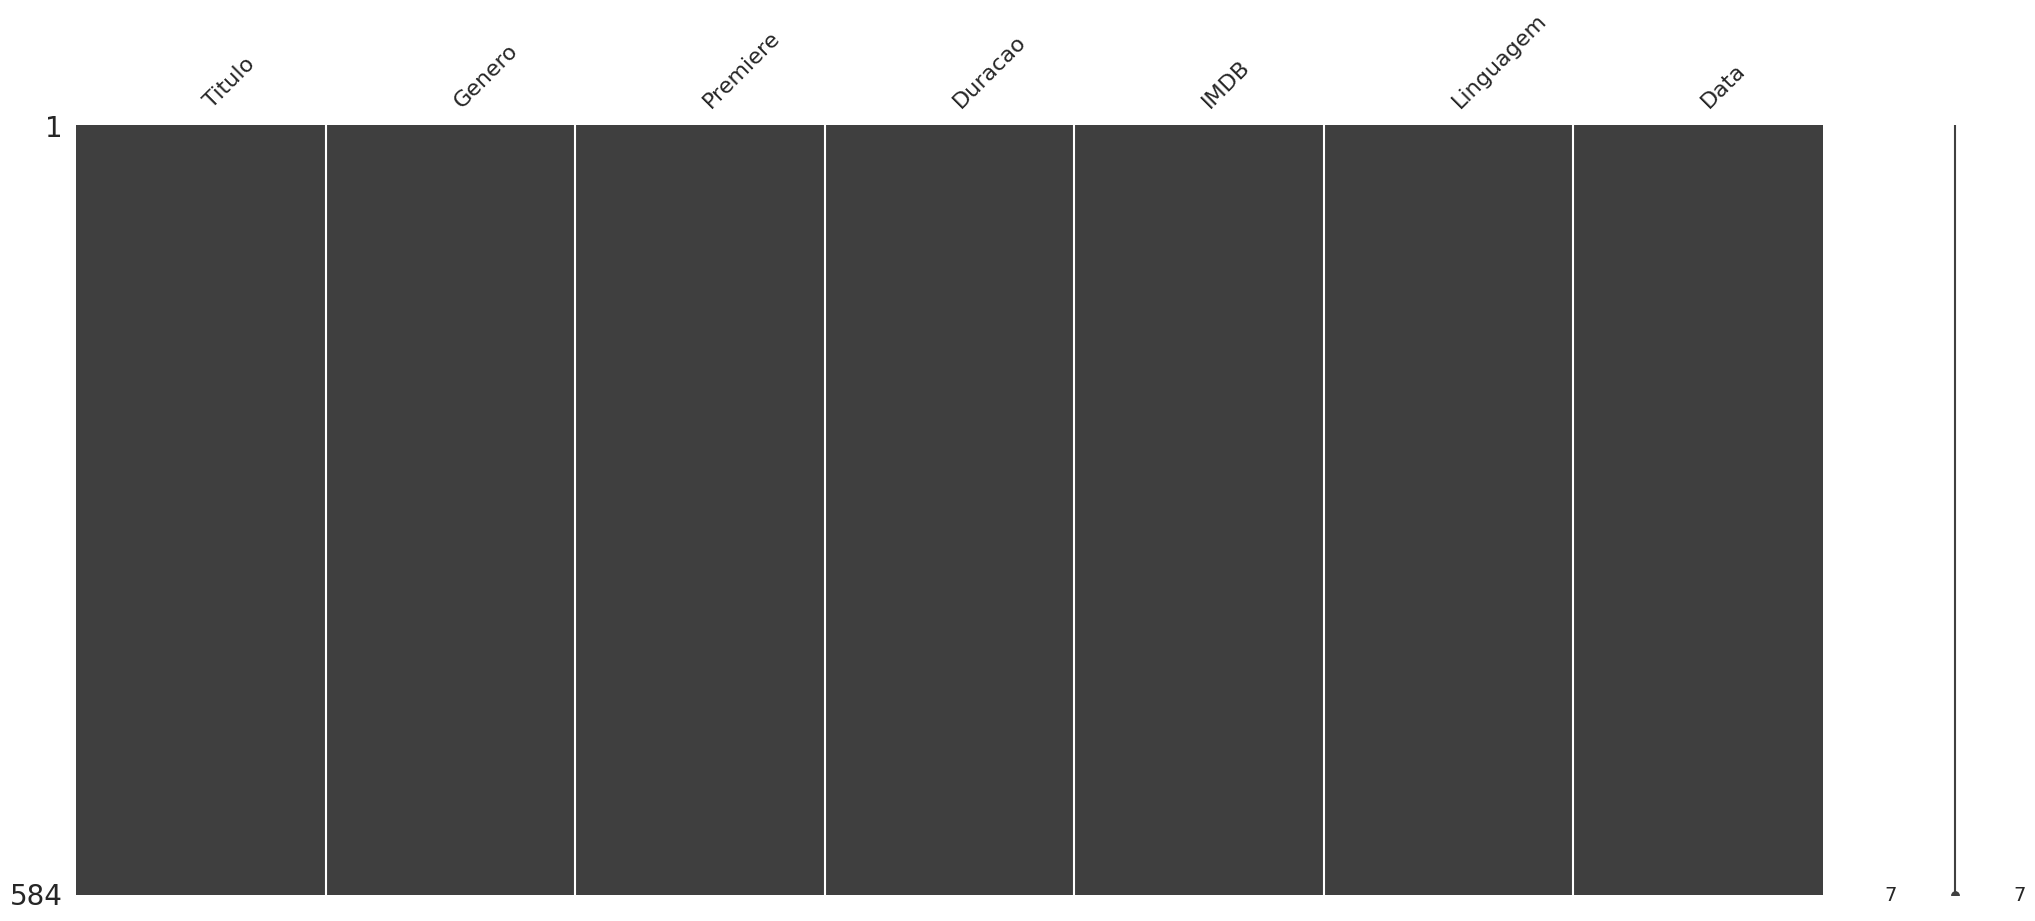

In [ ]:
# removendo as colunas deviradas de Premiere
dsNoMiss.drop(['Ano', 'Mes', 'DiaSemana'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(dsNoMiss)



---


**Resumo da análise de Missing e duplicatas**

*   Não há valor nulo no conjunto de dados.
*   Não há variáveis duplicadas


---

